<a href="https://colab.research.google.com/github/hws2002/MachineLearning_PytorchNScikitLearn/blob/master/chapter3/chater3_2_sklearn_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [2]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'Colab Notebooks/pyml/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME

%load_ext autoreload
%autoreload 2

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/pyml


# load dataset

## `load_iris`
이 함수는 파이썬 딕셔너리와 유사한 사이킷런의 Bunch 클래스 속성을 반환함.  
- data 속성 : 특성 행렬에 해당(쉽게 말해 X)
- target 속성 : 타깃 벡터에 해당(쉽게 말해 y)
- feature_names 속성 : 특성 이름을 담음
- target_names 속성 : 타깃 이름을 담음
- DESCR 속성 : 데이터셋에 대한 설명을 담음

In [3]:
iris = datasets.load_iris()
print(iris.DESCR)
X = iris.data[:, [2,3]]
y = iris.target
print('클래스 레이블:', np.unique(y))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# train test split

- random_state : train test set을 분할하기전, 먼저 데이터셋을 섞는다

- stratify : `train_test_split`함수가 훈련 데이터셋과 테스트 데이터셋의 클래스 레이블 비율을 입력 데이터셋과 동일하게 만들어줌

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1, stratify = y
)


In [5]:
# 계층화가 잘 되었는지 확인해보자

print("y의 레이블 카운트:",np.bincount(y))

print("y_train의 레이블 카운트 : ", np.bincount(y_train))

print("y_test의 레이블 카운트 : ", np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트 :  [35 35 35]
y_test의 레이블 카운트 :  [15 15 15]


# Preprocessing

## 표준화
우리가 앞전에 손으로 진행했던 표준화를 사이킷런 `preprocessing` 모듈의 `StandardScaler` 클래스로 진행해보자

In [6]:
# 기존에는 이런식으로 표준화 했었다
X_std = np.copy(X)
X_std[:,0] = ( X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = ( X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()


* `StandardScaler` 의 `fit` 메서드는 훈련 데이터셋의 각 특성 차원마다 샘플평균과 표준편차를 계산함

* `transform`메서드를 호출하면 계산된 샘플 평균과 표준 편차를 사용하여 훈련 데이터셋을 표준화시킴.


In [7]:
# 이제 이렇게 해보자
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 훈련

사이킷럿의 알고리즘은 대부분 기본적으로 OvR(one-versus-Rest) 방식을 사용하여 다중 분류 (multiclass classification) 을 지원함.

In [10]:
# 사이킷런 퍼셉트론 인스턴스를 생성하고 훈련해보자
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [12]:
# 예측해보자
y_pred = ppn.predict(X_test_std)

# 잘못 분류된 샘플의 개수를 출력해보자
print('잘못 분류된 샘플 개수 : %d ' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수 : 1 


## 분류 오차 vs 정확도
45개의 샘플에서 한개를 잘못 분류했기 때문에, 테스트 데이터셋에 대한 분류 오차는 약 0.022 (혹은 2.2%) 이다.

* 분류 오차 대신 많은 머신 러닝 기술자들이 모델의 분류 **정확도**(accuracy) 를 계산함.
1 - 오차 = 정확도

## metrics 모듈
사이킷런 라이브러리는 metrics 모듈 아래에 다양한 성능 지표를 구현해 놓음.
예를 들어 테스트셋에서 퍼셉트론의 분류 정확도는 아래와 같음

In [13]:
from sklearn.metrics import accuracy_score
print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.978


In [15]:
# 이를 metrics 모듈을 사용하지 않고, 사이킷런의 분류기(classifier) 자체로 얻을 수 있다
# 단, classifier가 이미 훈련된 상태여야겠지
print('정확도: %.3f' % ppn.score(X_test_std, y_test))

# 단, 이 score 메서드는 accuracy_score 메서드를 연결하여 정확도를 계산하므로, 미리 import는 해두어야 하는 것 같다.

정확도: 0.978


# drawing!

마지막으로 `plot_decision_boundary` 함수를 이용해서 새로운 퍼셉트론 모델의 결정 경계를 그려서 세 개의 붓꽃 샘플을 잘 구분하는지 '시각화' 해보자.
저번과는 살짝 다르게, 테스트 데이터셋의 샘플을 작은 원으로 다르게 표시해보자


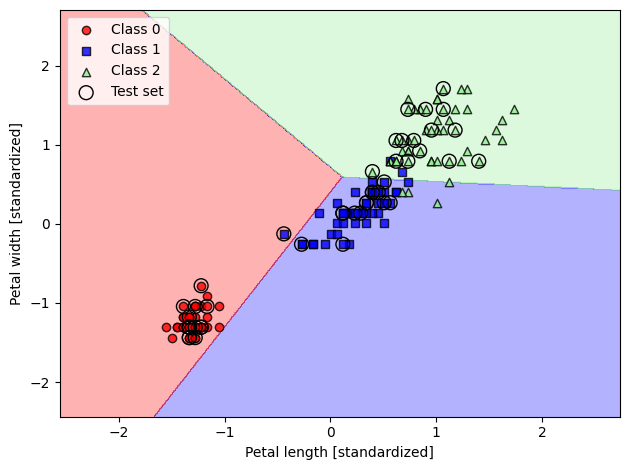

In [28]:
from utils.plot_decision_regions import plot_decision_boundary
# ppn 이 표준화시킨 데이터를 가지고 훈련했으므로, X 가 아닌 X_std를 넣어줘야 한다.
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))
plot_decision_boundary(X_combined_std, y_combined_std, ppn, range(105,150)) # 테스트 데이터의 개수는 45개이고, 총 데이터 개수는 150개이므로
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()


## 추가적인 퍼셉트론 설정
Perceptron은 물론 사이킷런의 함수나 클래스는 많은 매개변수를 가지고 있음
* Perceptron 클래스는 `SGDClassifier(loss = 'perceptron')` 과 거의 같음. loss를 제외하고 SGDClassifier에 있는 거의 모든 매개변수를 지원함. 하지만 클래스 분류 확률을 제공하는 `predict_prob()`, `predict_log_prob()` 메서드는 지원하지 않음.  

`help(Perceptron))` 을 통해 매개변수에 대한 상세 내용을 볼 수 있음.  
혹은 http://scikit-learn.org/stable/ 을 참고하자